In [1]:
import glob
from keras.models import Sequential,load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

Using TensorFlow backend.
D:\Setups\Anaconda\Setup\envs\impulse\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Setups\Anaconda\Setup\envs\impulse\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Setups\Anaconda\Setup\envs\impulse\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Setups\Anaconda\Setup\envs\impulse\lib

In [2]:
df = pd.read_csv("Chronic_Kidney_disease.csv")
df.head(8)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd


# This Program  Classifies patients as having chronic kidney disease or not using Artificial Neural Networks

In [3]:
df.shape

(400, 26)

In [4]:
# Create a list of column names to kepp

columns_to_retain = ['sg','al','sc','hemo','pcv','wbcc','rbcc','htn','classification']

# Drop unnecessary column
df = df.drop([col for col in df.columns if not col in columns_to_retain],axis =1)

# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [5]:
# Transform the non-numeric data in columns

for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform( df[column])

In [19]:
df.head(8)

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0
5,1.015,3.0,1.1,12.2,23,1,0
6,1.010,0.0,24.0,12.4,20,0,0
7,1.015,2.0,1.1,12.4,28,0,0


In [7]:
# Split the data into independent (x) dataset (the features) and dependent (Y) dataset (the target)

X = df.drop(['classification'],axis=1)
y = df['classification']

In [8]:
X.columns

Index(['sg', 'al', 'sc', 'hemo', 'pcv', 'htn'], dtype='object')

In [9]:
# Feature Scaling
# min-max scaler method scales the dataset so that all the input features lie between 0 and 1 

x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)
X[column_names]

,sg,al,sc,hemo,pcv,htn
0,0.75,0.2,0.033898,0.836735,0.717949,1.0
1,0.75,0.8,0.016949,0.557823,0.564103,0.0
2,0.25,0.4,0.059322,0.442177,0.384615,0.0
3,0.00,0.8,0.144068,0.551020,0.410256,1.0
4,0.25,0.4,0.042373,0.578231,0.487179,0.0
...,...,...,...,...,...,...
395,0.75,0.0,0.004237,0.857143,0.794872,0.0
396,1.00,0.0,0.033898,0.911565,0.974359,0.0
397,0.75,0.0,0.008475,0.863946,0.846154,0.0
398,1.00,0.0,0.025424,0.755102,0.897436,0.0


In [10]:
# Split the data into 80% trainig and 20% testing and shuffle

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [11]:
# Build the Model
model = Sequential()
model.add( Dense(256, input_dim = len(X.columns) , kernel_initializer = k.initializers.random_normal(seed=13),activation="relu"))
model.add( Dense(1,activation = "hard_sigmoid"))


Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# Compile the model

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [13]:
# Train the model

history = model.fit(X_train,y_train,epochs=2000,batch_size=X_train.shape[0])
# epoch is the number of times it will loop through the dataset and batch_size is the size of samples

Instructions for updating:
Use tf.cast instead.
Epoch 1/2000
229/229 [==============================] - 1s 3ms/step - loss: 0.6861 - accuracy: 0.4498
Epoch 2/2000
229/229 [==============================] - 0s 47us/step - loss: 0.6786 - accuracy: 0.4498
Epoch 3/2000
229/229 [==============================] - 0s 9us/step - loss: 0.6711 - accuracy: 0.4803
Epoch 4/2000
229/229 [==============================] - 0s 4us/step - loss: 0.6638 - accuracy: 0.5328
Epoch 5/2000
229/229 [==============================] - 0s 0us/step - loss: 0.6565 - accuracy: 0.5808
Epoch 6/2000
229/229 [==============================] - 0s 34us/step - loss: 0.6494 - accuracy: 0.6463
Epoch 7/2000
229/229 [==============================] - 0s 9us/step - loss: 0.6422 - accuracy: 0.7118
Epoch 8/2000
229/229 [==============================] - 0s 6us/step - loss: 0.6352 - accuracy: 0.7642
Epoch 9/2000
229/229 [==============================] - 0s 9us/step - loss: 0.6282 - accuracy: 0.7686
Epoch 10/2000
229/229 [=========

Epoch 78/2000
229/229 [==============================] - 0s 4us/step - loss: 0.1698 - accuracy: 0.9127
Epoch 79/2000
229/229 [==============================] - 0s 4us/step - loss: 0.1667 - accuracy: 0.9127
Epoch 80/2000
229/229 [==============================] - 0s 4us/step - loss: 0.1638 - accuracy: 0.9170
Epoch 81/2000
229/229 [==============================] - 0s 9us/step - loss: 0.1611 - accuracy: 0.9214
Epoch 82/2000
229/229 [==============================] - 0s 4us/step - loss: 0.1587 - accuracy: 0.9214
Epoch 83/2000
229/229 [==============================] - 0s 4us/step - loss: 0.1563 - accuracy: 0.9214
Epoch 84/2000
229/229 [==============================] - 0s 4us/step - loss: 0.1540 - accuracy: 0.9214
Epoch 85/2000
229/229 [==============================] - 0s 9us/step - loss: 0.1517 - accuracy: 0.9214
Epoch 86/2000
229/229 [==============================] - 0s 9us/step - loss: 0.1496 - accuracy: 0.9214
Epoch 87/2000
229/229 [==============================] - 0s 4us/step - lo

Epoch 157/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0787 - accuracy: 0.9694
Epoch 158/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0781 - accuracy: 0.9694
Epoch 159/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0776 - accuracy: 0.9694
Epoch 160/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0771 - accuracy: 0.9694
Epoch 161/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0766 - accuracy: 0.9694
Epoch 162/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0761 - accuracy: 0.9694
Epoch 163/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0755 - accuracy: 0.9694
Epoch 164/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0750 - accuracy: 0.9694
Epoch 165/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0746 - accuracy: 0.9694
Epoch 166/2000
229/229 [==============================] - 0s 9us

Epoch 236/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0503 - accuracy: 0.9825
Epoch 237/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0501 - accuracy: 0.9825
Epoch 238/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0498 - accuracy: 0.9825
Epoch 239/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0496 - accuracy: 0.9825
Epoch 240/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0494 - accuracy: 0.9825
Epoch 241/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0491 - accuracy: 0.9825
Epoch 242/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0489 - accuracy: 0.9825
Epoch 243/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0487 - accuracy: 0.9825
Epoch 244/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0484 - accuracy: 0.9825
Epoch 245/2000
229/229 [==============================] - 0s 9us

Epoch 315/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0364 - accuracy: 0.9825
Epoch 316/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0362 - accuracy: 0.9825
Epoch 317/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0361 - accuracy: 0.9825
Epoch 318/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0360 - accuracy: 0.9825
Epoch 319/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0359 - accuracy: 0.9825
Epoch 320/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0357 - accuracy: 0.9825
Epoch 321/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0356 - accuracy: 0.9825
Epoch 322/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0355 - accuracy: 0.9825
Epoch 323/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0354 - accuracy: 0.9825
Epoch 324/2000
229/229 [==============================] - 0s 4us

Epoch 394/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0283 - accuracy: 0.9825
Epoch 395/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0282 - accuracy: 0.9825
Epoch 396/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0281 - accuracy: 0.9825
Epoch 397/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0280 - accuracy: 0.9825
Epoch 398/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0279 - accuracy: 0.9825
Epoch 399/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0279 - accuracy: 0.9825
Epoch 400/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0278 - accuracy: 0.9825
Epoch 401/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0277 - accuracy: 0.9825
Epoch 402/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0276 - accuracy: 0.9825
Epoch 403/2000
229/229 [==============================] - 0s 7us

Epoch 473/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0229 - accuracy: 0.9869
Epoch 474/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0229 - accuracy: 0.9869
Epoch 475/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0228 - accuracy: 0.9869
Epoch 476/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0228 - accuracy: 0.9869
Epoch 477/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0227 - accuracy: 0.9869
Epoch 478/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0227 - accuracy: 0.9869
Epoch 479/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0227 - accuracy: 0.9869
Epoch 480/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0226 - accuracy: 0.9869
Epoch 481/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0226 - accuracy: 0.9869
Epoch 482/2000
229/229 [==============================] - 0s 4us

Epoch 552/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0202 - accuracy: 0.9913
Epoch 553/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0202 - accuracy: 0.9913
Epoch 554/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0202 - accuracy: 0.9913
Epoch 555/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0201 - accuracy: 0.9913
Epoch 556/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0201 - accuracy: 0.9913
Epoch 557/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0201 - accuracy: 0.9913
Epoch 558/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0200 - accuracy: 0.9913
Epoch 559/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0200 - accuracy: 0.9913
Epoch 560/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0200 - accuracy: 0.9913
Epoch 561/2000
229/229 [==============================] - 0s 9us

Epoch 631/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0182 - accuracy: 0.9913
Epoch 632/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0181 - accuracy: 0.9913
Epoch 633/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0181 - accuracy: 0.9913
Epoch 634/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0181 - accuracy: 0.9913
Epoch 635/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0181 - accuracy: 0.9913
Epoch 636/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0180 - accuracy: 0.9913
Epoch 637/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0180 - accuracy: 0.9913
Epoch 638/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0180 - accuracy: 0.9913
Epoch 639/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0180 - accuracy: 0.9913
Epoch 640/2000
229/229 [==============================] - 0s 4us

Epoch 710/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0167 - accuracy: 0.9913
Epoch 711/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0167 - accuracy: 0.9913
Epoch 712/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0167 - accuracy: 0.9913
Epoch 713/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0167 - accuracy: 0.9913
Epoch 714/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0167 - accuracy: 0.9913
Epoch 715/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0167 - accuracy: 0.9913
Epoch 716/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0167 - accuracy: 0.9913
Epoch 717/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0166 - accuracy: 0.9913
Epoch 718/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0166 - accuracy: 0.9913
Epoch 719/2000
229/229 [==============================] - 0s 4us

Epoch 789/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0156 - accuracy: 0.9956
Epoch 790/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0156 - accuracy: 0.9956
Epoch 791/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0156 - accuracy: 0.9956
Epoch 792/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0155 - accuracy: 0.9956
Epoch 793/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0155 - accuracy: 0.9956
Epoch 794/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0155 - accuracy: 0.9956
Epoch 795/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0155 - accuracy: 0.9956
Epoch 796/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0155 - accuracy: 0.9956
Epoch 797/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0155 - accuracy: 0.9956
Epoch 798/2000
229/229 [==============================] - 0s 4us

Epoch 868/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0146 - accuracy: 0.9956
Epoch 869/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0146 - accuracy: 0.9956
Epoch 870/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0146 - accuracy: 0.9956
Epoch 871/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0146 - accuracy: 0.9956
Epoch 872/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0146 - accuracy: 0.9956
Epoch 873/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0146 - accuracy: 0.9956
Epoch 874/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0145 - accuracy: 0.9956
Epoch 875/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0145 - accuracy: 0.9956
Epoch 876/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0145 - accuracy: 0.9956
Epoch 877/2000
229/229 [==============================] - 0s 9us

Epoch 947/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0137 - accuracy: 0.9956
Epoch 948/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0136 - accuracy: 0.9956
Epoch 949/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0136 - accuracy: 0.9956
Epoch 950/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0136 - accuracy: 0.9956
Epoch 951/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0136 - accuracy: 0.9956
Epoch 952/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0136 - accuracy: 0.9956
Epoch 953/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0136 - accuracy: 0.9956
Epoch 954/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0136 - accuracy: 0.9956
Epoch 955/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0136 - accuracy: 0.9956
Epoch 956/2000
229/229 [==============================] - 0s 4u

Epoch 1026/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0127 - accuracy: 0.9956
Epoch 1027/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0127 - accuracy: 0.9956
Epoch 1028/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0127 - accuracy: 0.9956
Epoch 1029/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0126 - accuracy: 0.9956
Epoch 1030/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0126 - accuracy: 0.9956
Epoch 1031/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0126 - accuracy: 0.9956
Epoch 1032/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0126 - accuracy: 0.9956
Epoch 1033/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0126 - accuracy: 0.9956
Epoch 1034/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0126 - accuracy: 0.9956
Epoch 1035/2000
229/229 [==============================

Epoch 1105/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0117 - accuracy: 0.9956
Epoch 1106/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0117 - accuracy: 0.9956
Epoch 1107/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0117 - accuracy: 0.9956
Epoch 1108/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0117 - accuracy: 0.9956
Epoch 1109/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0117 - accuracy: 0.9956
Epoch 1110/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0117 - accuracy: 0.9956
Epoch 1111/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0117 - accuracy: 0.9956
Epoch 1112/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0117 - accuracy: 0.9956
Epoch 1113/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0117 - accuracy: 0.9956
Epoch 1114/2000
229/229 [==============================

Epoch 1184/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1185/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1186/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1187/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1188/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1189/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1190/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0108 - accuracy: 0.9956
Epoch 1191/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0108 - accuracy: 0.9956
Epoch 1192/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0108 - accuracy: 0.9956
Epoch 1193/2000
229/229 [==============================

Epoch 1263/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0102 - accuracy: 0.9956
Epoch 1264/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0102 - accuracy: 0.9956
Epoch 1265/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0102 - accuracy: 0.9956
Epoch 1266/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0102 - accuracy: 0.9956
Epoch 1267/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0102 - accuracy: 0.9956
Epoch 1268/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0102 - accuracy: 0.9956
Epoch 1269/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0102 - accuracy: 0.9956
Epoch 1270/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0101 - accuracy: 0.9956
Epoch 1271/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0101 - accuracy: 0.9956
Epoch 1272/2000
229/229 [==============================

229/229 [==============================] - 0s 9us/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1342/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1343/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1344/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1345/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1346/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1347/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1348/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1349/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1350/2000
229/229 [==============================] - 0s 4us/step 

Epoch 1420/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1421/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1422/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1423/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1424/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1425/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1426/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1427/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1428/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1429/2000
229/229 [==============================

229/229 [==============================] - 0s 4us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1499/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1500/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1501/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1502/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1503/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1504/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1505/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1506/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0091 - accuracy: 0.9956
Epoch 1507/2000
229/229 [==============================] - 0s 9us/step 

Epoch 1577/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0087 - accuracy: 0.9956
Epoch 1578/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0087 - accuracy: 0.9956
Epoch 1579/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0087 - accuracy: 0.9956
Epoch 1580/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0087 - accuracy: 0.9956
Epoch 1581/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0087 - accuracy: 0.9956
Epoch 1582/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0087 - accuracy: 0.9956
Epoch 1583/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0087 - accuracy: 0.9956
Epoch 1584/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0087 - accuracy: 0.9956
Epoch 1585/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0087 - accuracy: 0.9956
Epoch 1586/2000
229/229 [=============================

Epoch 1656/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1657/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1658/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1659/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1660/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1661/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1662/2000
229/229 [==============================] - 0s 10us/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1663/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1664/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1665/2000
229/229 [=============================

Epoch 1735/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0079 - accuracy: 0.9956
Epoch 1736/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0079 - accuracy: 0.9956
Epoch 1737/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0079 - accuracy: 0.9956
Epoch 1738/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0079 - accuracy: 0.9956
Epoch 1739/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0079 - accuracy: 0.9956
Epoch 1740/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0079 - accuracy: 0.9956
Epoch 1741/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0079 - accuracy: 0.9956
Epoch 1742/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0079 - accuracy: 0.9956
Epoch 1743/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0079 - accuracy: 0.9956
Epoch 1744/2000
229/229 [==============================

Epoch 1814/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1815/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1816/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1817/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1818/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1819/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1820/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1821/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1822/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1823/2000
229/229 [==============================

Epoch 1893/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1894/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0073 - accuracy: 0.9956
Epoch 1895/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0073 - accuracy: 0.9956
Epoch 1896/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0073 - accuracy: 0.9956
Epoch 1897/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0073 - accuracy: 0.9956
Epoch 1898/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1899/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1900/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0073 - accuracy: 0.9956
Epoch 1901/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0073 - accuracy: 0.9956
Epoch 1902/2000
229/229 [==============================

Epoch 1972/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0069 - accuracy: 0.9956
Epoch 1973/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0069 - accuracy: 0.9956
Epoch 1974/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0069 - accuracy: 0.9956
Epoch 1975/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0069 - accuracy: 0.9956
Epoch 1976/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0069 - accuracy: 0.9956
Epoch 1977/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0069 - accuracy: 0.9956
Epoch 1978/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0069 - accuracy: 0.9956
Epoch 1979/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0069 - accuracy: 0.9956
Epoch 1980/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0069 - accuracy: 0.9956
Epoch 1981/2000
229/229 [==============================

In [14]:
# Saved the model
# model.save("ckd.model")
import pickle
with open("CKD","wb") as f:
    pickle.dump(model,f)

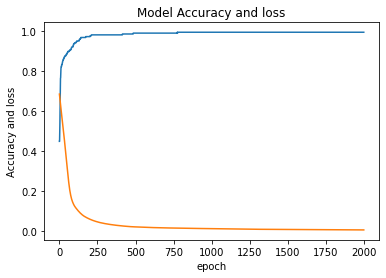

In [15]:
# Visualize the models loss and accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title("Model Accuracy and loss")
plt.ylabel("Accuracy and loss")
plt.xlabel("epoch")
plt.show()


In [16]:
# Get the Shape of the training and testing dataset

print("Shape of the training dataset : ",X_train.shape)
print("Shape of the testing dataset : ",X_test.shape)

Shape of the training dataset :  (229, 6)
Shape of the testing dataset :  (58, 6)


In [17]:
# Show the actual and predicted values
pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred]

print("Original : {0}".format(", ".join(str(x) for x in y_test)))
print()
print("Predicted : {0}".format(", ".join(str(x) for x in pred)))

Original : 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1

Predicted : 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1


In [18]:
# Show the actual values

y_test

180    0
137    0
70     0
385    1
73     0
332    1
364    1
390    1
149    0
49     0
177    0
135    0
373    1
374    1
289    1
69     0
286    1
71     0
158    0
397    1
393    1
80     0
25     0
282    1
1      0
392    1
342    1
362    1
387    1
294    1
244    0
378    1
269    1
199    0
112    0
178    0
43     0
325    1
275    1
185    0
144    0
254    1
46     0
152    0
263    1
304    1
382    1
321    1
171    0
398    1
8      0
200    0
357    1
284    1
172    0
214    0
53     0
389    1
Name: classification, dtype: int32